<a href="https://colab.research.google.com/github/2303A51050/AIML-2025_B16/blob/main/LAB_EXAM_1050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
file_path = '/content/loan_data (1).csv'
data = pd.read_csv(file_path)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
if y.dtypes == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns.tolist()),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=3))])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN (k=3): {accuracy:.2f}")

Accuracy of KNN (k=3): 0.89


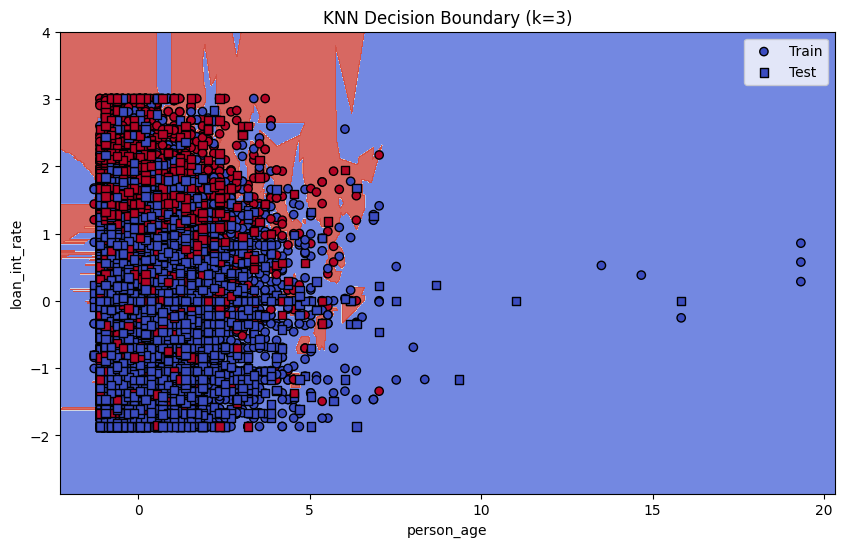

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
feature1 = 'person_age'
feature2 = 'loan_int_rate'
X = data[[feature1, feature2]].values
y = data.iloc[:, -1]
if y.dtypes == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', cmap=plt.cm.coolwarm, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor='k', cmap=plt.cm.coolwarm, label='Test')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('KNN Decision Boundary (k=3)')
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np
features = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'
]
X = data[features]
y = data['loan_status']
X = X.apply(pd.to_numeric, errors='coerce').fillna(X.mean())
y = pd.to_numeric(y, errors='coerce').fillna(0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[9927  566]
 [1789 1218]]


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
features = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'
]
X = data[features]
y = data['loan_status']
X = X.apply(pd.to_numeric, errors='coerce').fillna(X.mean())
y = pd.to_numeric(y, errors='coerce').fillna(0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_no_scaling = KNeighborsClassifier()
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print("Confusion Matrix (KNN without scaling):")
print(conf_matrix_no_scaling)
print(f"Accuracy (KNN without scaling): {accuracy_no_scaling:.2f}")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_with_scaling = KNeighborsClassifier()
knn_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)
conf_matrix_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print("Confusion Matrix (KNN with scaling):")
print(conf_matrix_with_scaling)
print(f"Accuracy (KNN with scaling): {accuracy_with_scaling:.2f}")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix)

Confusion Matrix (KNN without scaling):
[[9694  799]
 [1489 1518]]
Accuracy (KNN without scaling): 0.83
Confusion Matrix (KNN with scaling):
[[9684  809]
 [1501 1506]]
Accuracy (KNN with scaling): 0.83
Confusion Matrix (Logistic Regression):
[[9927  566]
 [1789 1218]]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
features = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'
]
X = data[features]
y = data['loan_status']
X = X.apply(pd.to_numeric, errors='coerce').fillna(X.mean())
y = pd.to_numeric(y, errors='coerce').fillna(0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train_scaled, y_train)
y_pred_k5 = knn_k5.predict(X_test_scaled)
conf_matrix_k5 = confusion_matrix(y_test, y_pred_k5)
accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print("Confusion Matrix (KNN with k=5 and scaling):")
print(conf_matrix_k5)
print(f"Accuracy (KNN with k=5 and scaling): {accuracy_k5:.2f}")
knn_no_scaling = KNeighborsClassifier()
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print("Confusion Matrix (KNN without scaling):")
print(conf_matrix_no_scaling)
print(f"Accuracy (KNN without scaling): {accuracy_no_scaling:.2f}")
knn_with_scaling = KNeighborsClassifier()
knn_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)
conf_matrix_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print("Confusion Matrix (KNN with scaling):")
print(conf_matrix_with_scaling)
print(f"Accuracy (KNN with scaling): {accuracy_with_scaling:.2f}")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix)

Confusion Matrix (KNN with k=5 and scaling):
[[9684  809]
 [1501 1506]]
Accuracy (KNN with k=5 and scaling): 0.83
Confusion Matrix (KNN without scaling):
[[9694  799]
 [1489 1518]]
Accuracy (KNN without scaling): 0.83
Confusion Matrix (KNN with scaling):
[[9684  809]
 [1501 1506]]
Accuracy (KNN with scaling): 0.83
Confusion Matrix (Logistic Regression):
[[9927  566]
 [1789 1218]]
